In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import seaborn as sns

In [2]:
df1 = pd.read_csv('../project_dataset/extract - fees - data analyst.csv')

# Load the second CSV file
df2 = pd.read_csv('../project_dataset/extract - cash request - data analyst.csv')


/var/folders/r6/ycxt4t395sz7rs26t5w0vjgc0000gn/T/ipykernel_17284/3167813892.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df2['created_at'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')


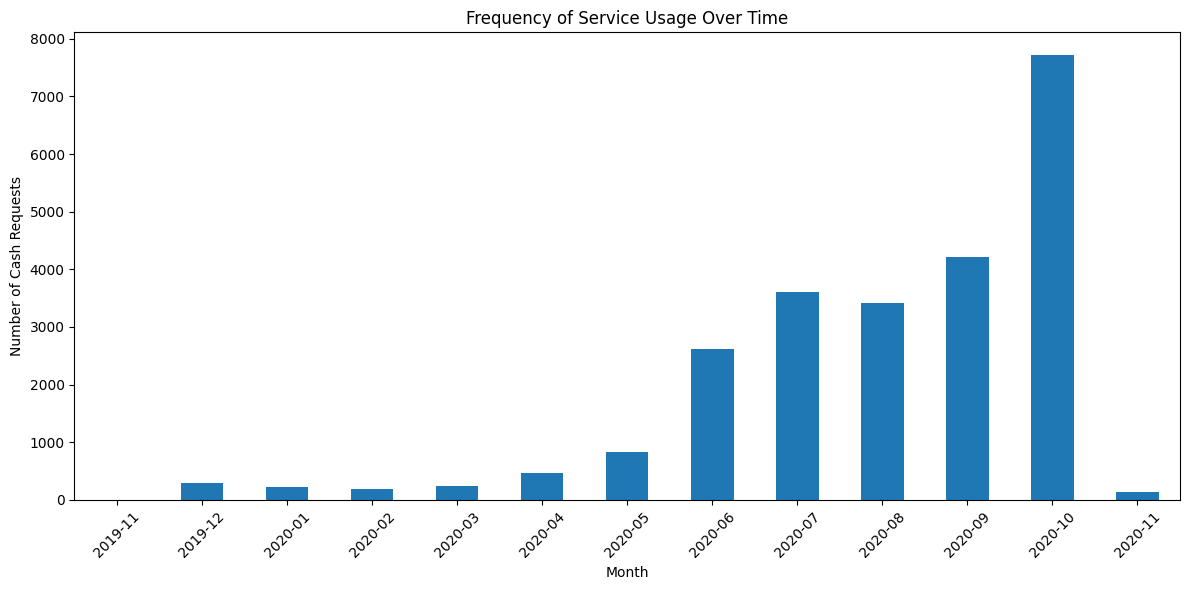

In [3]:
df2['created_at'] = pd.to_datetime(df2['created_at'])

# Plot the frequency of service usage over time
plt.figure(figsize=(12, 6))
df2['created_at'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Frequency of Service Usage Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Cash Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/r6/ycxt4t395sz7rs26t5w0vjgc0000gn/T/ipykernel_17284/1814890675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df1, order=df1['category'].value_counts().index, palette='viridis')


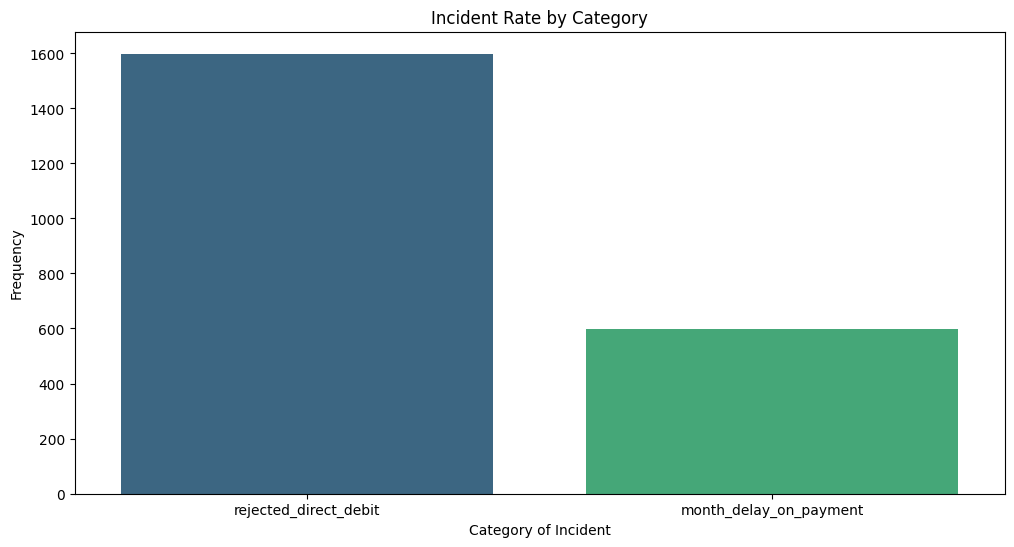

In [4]:
# Plot the incident rate focused on cohorts
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df1, order=df1['category'].value_counts().index, palette='viridis')
plt.title('Incident Rate by Category')
plt.xlabel('Category of Incident')
plt.ylabel('Frequency')
plt.show()

/var/folders/r6/ycxt4t395sz7rs26t5w0vjgc0000gn/T/ipykernel_17284/1989226776.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df1['cohort_month'] = df1['created_at'].dt.to_period('M')


Total Revenue by Cohort:
cohort_month
2020-05       80.0
2020-06     3845.0
2020-07     8095.0
2020-08    15260.0
2020-09    22860.0
2020-10    53835.0
2020-11     1335.0
Freq: M, Name: total_amount, dtype: float64


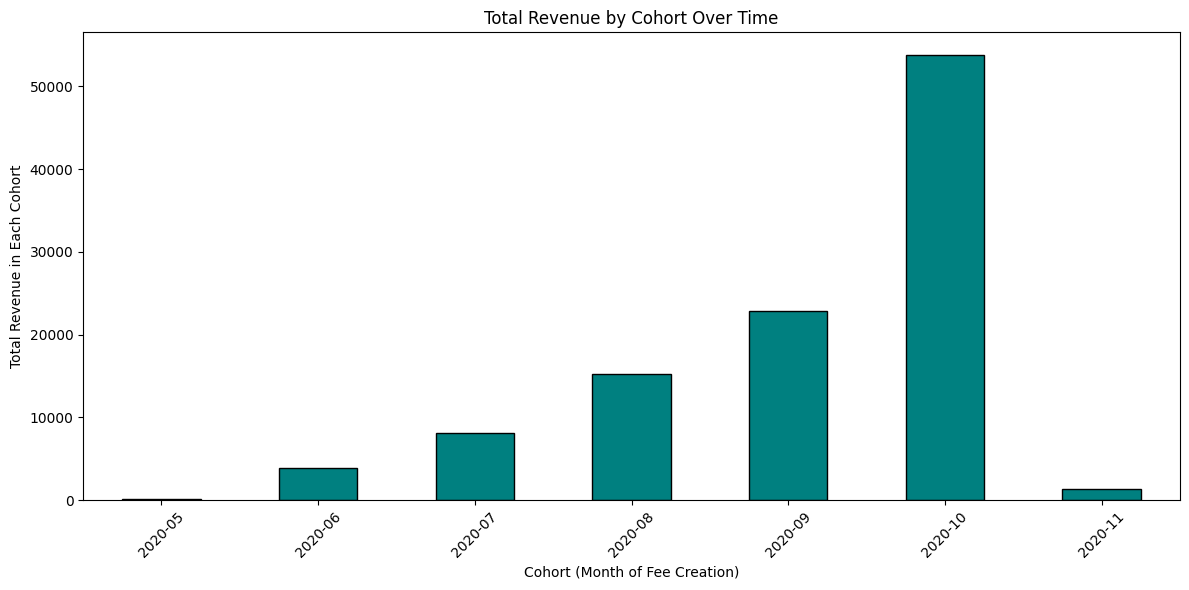

In [5]:
df1['created_at'] = pd.to_datetime(df1['created_at'])

# Define cohorts based on the month of fee creation
df1['cohort_month'] = df1['created_at'].dt.to_period('M')

# Calculate total revenue by cohort month
revenue_by_cohort = df1.groupby('cohort_month')['total_amount'].sum().sort_index()

# Print the revenue data for verification
print("Total Revenue by Cohort:")
print(revenue_by_cohort)

# Plot the total revenue generated by each cohort over months
plt.figure(figsize=(12, 6))
revenue_by_cohort.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Total Revenue by Cohort Over Time')
plt.xlabel('Cohort (Month of Fee Creation)')
plt.ylabel('Total Revenue in Each Cohort')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average Processing Time: 75.38135168961202 days


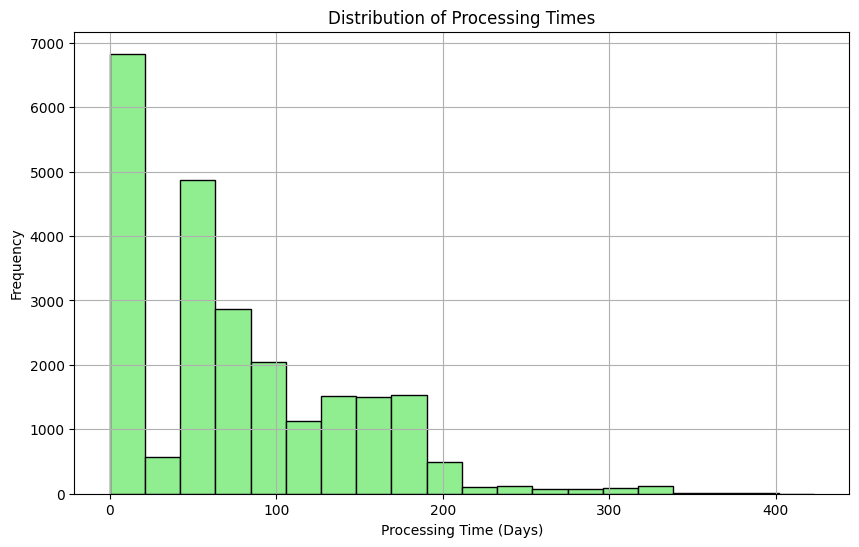

In [6]:
# Convert strings to datetime
df2['created_at'] = pd.to_datetime(df2['created_at'])
df2['updated_at'] = pd.to_datetime(df2['updated_at'])

# Calculate processing time in days
df2['processing_time_days'] = (df2['updated_at'] - df2['created_at']).dt.days

# Average processing time
average_processing_time = df2['processing_time_days'].mean()
print(f"Average Processing Time: {average_processing_time} days")

# Histogram of processing times
plt.figure(figsize=(10, 6))
df2['processing_time_days'].hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Processing Times')
plt.xlabel('Processing Time (Days)')
plt.ylabel('Frequency')
plt.show()